<a href="https://colab.research.google.com/github/LEEINSEO-0118/Brand_Detective/blob/main/Detection_Model/Load_Brand_Detective_YOLOv8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import


In [1]:
pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 699.7/699.7 kB 5.7 MB/s eta 0:00:00


In [2]:
import os
import fnmatch
import zipfile

from ultralytics import YOLO
import torch

import cv2

import random
import matplotlib.pyplot as plt

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#SEED


In [4]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(2024) # Seed 고정

# Load pretrained model


In [5]:
model = YOLO('/content/drive/MyDrive/ai부트캠프/Final_Project/Logo_Detection/YOLOv8_Logo_Detection_best.pt')  # load a pretrained YOLOv8n detection model
print(type(model.names), len(model.names))
print(model.names)

<class 'dict'> 1
{0: 'Logos'}


# Inference


In [7]:
results = model.predict('/content/drive/MyDrive/ai부트캠프/Final_Project/Data/trademark_fake', conf = 0.3, iou = 0.5, save = True)


image 1/3 /content/drive/MyDrive/ai부트캠프/Final_Project/Data/trademark_fake/adidas_sports_fake_1.jpeg: 640x480 1 Logos, 11.6ms
image 2/3 /content/drive/MyDrive/ai부트캠프/Final_Project/Data/trademark_fake/adidas_sports_fake_2.jpeg: 640x640 1 Logos, 10.0ms
image 3/3 /content/drive/MyDrive/ai부트캠프/Final_Project/Data/trademark_fake/adidas_sports_fake_3.jpeg: 640x640 1 Logos, 7.4ms
Speed: 2.1ms preprocess, 9.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)
Results saved to runs/detect/predict


### View inferenced images

test folder : predict


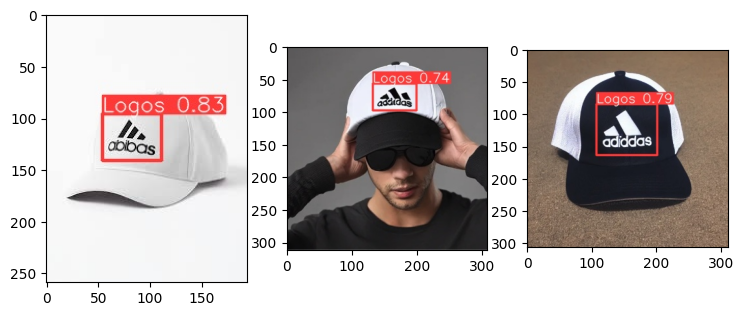

In [8]:
for file_name in os.listdir(f'/content/runs/detect'):
    test_folder = file_name
    break
# test_folder = 'train6'
print(f'test folder : {test_folder}')

fig = plt.figure(figsize=(15, 15))
rows = 3
cols = 5
i = 1

for file_name in os.listdir(f'/content/runs/detect/{test_folder}'):
    if fnmatch.fnmatch(file_name, '*.jpeg*'):
        image = cv2.imread(f'/content/runs/detect/{test_folder}/{file_name}')
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        ax = fig.add_subplot(rows, cols, i)
        ax.imshow(image)
        i += 1
plt.show()

#Crop Inferened Images


In [9]:
for i, result in enumerate(results): # 모든 이미지 별로 이미지 경로 및 bbox list를 받아온다.
    boxes = result.boxes.cpu().numpy()

    for j, box in enumerate(boxes): # 이미지의 bbox list
        image = result.orig_img
        bbox = box.xyxy[0].astype(int) # bbox 가져오기
        cropped_image = image[bbox[1]:bbox[3], bbox[0]:bbox[2]] # image에서 bbox영역 crop

        cv2.imwrite(f'/content/drive/MyDrive/ai부트캠프/Final_Project/Data/cropped/crop_image_{i+1}_{j+1}.jpg', cropped_image)

### View Cropped images


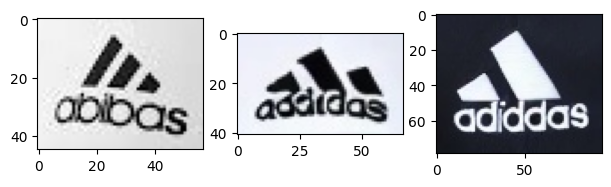

In [10]:
# for image view
fig = plt.figure(figsize=(15, 15))
rows = 6
cols = 6
i = 1
for file_name in os.listdir(f'/content/drive/MyDrive/ai부트캠프/Final_Project/Data/cropped'):
    image = cv2.imread(f'/content/drive/MyDrive/ai부트캠프/Final_Project/Data/cropped/{file_name}')
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    ax = fig.add_subplot(rows, cols, i)
    ax.imshow(image)
    i += 1
plt.show()

In [ ]:
# Delete Cropped images at GD
# for file_path in os.listdir(f'/content/drive/MyDrive/ai부트캠프/Final_Project/Data/cropped'):
#     os.remove(f'/content/drive/MyDrive/ai부트캠프/Final_Project/Data/cropped/{file_path}')